In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('../data/dataset.csv')
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


In [37]:
data.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [38]:
from sklearn.feature_selection import VarianceThreshold

# Set a variance threshold
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(data.drop(columns=["phishing"]))

selected_features = data.drop(columns=["phishing"]).columns[selector.get_support()]
data = data[selected_features.tolist() + ["phishing"]]

print("Selected Features:", selected_features.tolist())

Selected Features: ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file',

In [39]:
# Compute correlation matrix
corr_matrix = data.corr()

# Identify highly correlated features (absolute correlation > 0.8)
threshold = 0.80
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Drop highly correlated features
data = data.drop(columns=high_corr_features)
print(f"Remaining Features: {data.columns}")

Remaining Features: Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url',
       'qty_exclamation_url', 'qty_plus_url', 'qty_asterisk_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_questionmark_directory', 'directory_length', 'qty_hyphen_file',
       'file_length', 'qty_dot_params', 'qty_hyphen_params',
       'qty_underline_params', 'qty_slash_params', 'qty_questionmark_params',
       'qty_percent_params', 'email_in_url', 'time_response', 'domain_spf',
       'asn_ip', 'time_domain_activation', 'time_domain_expiration',
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'phishing'],
      dtype='object')


In [40]:
data.shape

(58645, 43)

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Define features (X) and target (y)
X = data.drop(columns=["phishing"])
y = data["phishing"]

# Compute information gain (mutual information)
selector = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
data = data[selected_features.tolist() + ["phishing"]]

print("Selected Features:", selected_features.tolist())


Selected Features: ['qty_slash_url', 'length_url', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_questionmark_directory', 'directory_length', 'qty_hyphen_file', 'file_length', 'qty_dot_params', 'qty_questionmark_params', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'ttl_hostname']


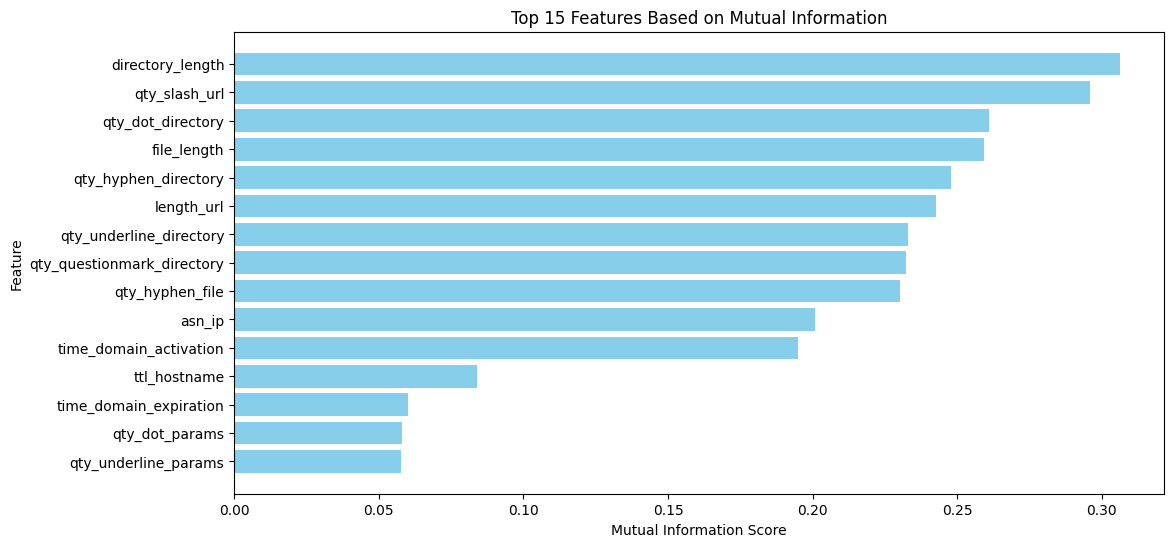

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Sort feature scores in descending order
sorted_indices = np.argsort(mi_scores)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_scores = mi_scores[sorted_indices]

# Plot the scores
plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:15], sorted_scores[:15], color="skyblue")  # Plot top 15 features
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Top 15 Features Based on Mutual Information")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [43]:
data.head()

,qty_slash_url,length_url,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_questionmark_directory,directory_length,qty_hyphen_file,file_length,qty_dot_params,qty_questionmark_params,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname,phishing
0,0,14,-1,-1,-1,-1,-1,-1,-1,-1,-1,8560,4927,185,3598,0
1,2,38,0,0,0,0,6,0,0,-1,-1,263283,8217,-1,3977,0
2,1,24,0,0,0,0,1,0,0,-1,-1,26496,258,106,10788,0
3,3,38,0,0,0,0,13,0,0,-1,-1,20013,2602,319,14339,1
4,4,46,0,0,0,0,27,0,0,-1,-1,41828,-1,-1,389,1


In [45]:
data.describe()

,qty_slash_url,length_url,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_questionmark_directory,directory_length,qty_hyphen_file,file_length,qty_dot_params,qty_questionmark_params,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,1.937522,44.959297,0.022338,-0.033814,-0.210947,-0.298525,16.923932,-0.211084,4.659067,-0.714451,-0.860670,33140.826447,2531.939483,293.615074,5056.676272,0.522585
std,2.037525,54.712657,0.932358,1.231963,0.702284,0.457615,28.066352,0.870709,16.358671,1.193137,0.386856,50339.910407,2799.792419,562.400108,7102.853538,0.499494
min,0.000000,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,18.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,13335.000000,-1.000000,-1.000000,288.000000,0.000000
50%,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,-1.000000,-1.000000,20013.000000,1488.000000,125.000000,1191.000000,1.000000
75%,3.000000,52.000000,1.000000,0.000000,0.000000,0.000000,27.000000,0.000000,9.000000,-1.000000,-1.000000,36351.000000,4754.000000,319.000000,9866.000000,1.000000
max,44.000000,4165.000000,19.000000,23.000000,17.000000,0.000000,1286.000000,21.000000,1232.000000,23.000000,9.000000,395754.000000,17775.000000,22574.000000,86400.000000,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   qty_slash_url               58645 non-null  int64
 1   length_url                  58645 non-null  int64
 2   qty_dot_directory           58645 non-null  int64
 3   qty_hyphen_directory        58645 non-null  int64
 4   qty_underline_directory     58645 non-null  int64
 5   qty_questionmark_directory  58645 non-null  int64
 6   directory_length            58645 non-null  int64
 7   qty_hyphen_file             58645 non-null  int64
 8   file_length                 58645 non-null  int64
 9   qty_dot_params              58645 non-null  int64
 10  qty_questionmark_params     58645 non-null  int64
 11  asn_ip                      58645 non-null  int64
 12  time_domain_activation      58645 non-null  int64
 13  time_domain_expiration      58645 non-null  int64
 14  ttl_ho

In [47]:
data.head()

,qty_slash_url,length_url,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_questionmark_directory,directory_length,qty_hyphen_file,file_length,qty_dot_params,qty_questionmark_params,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname,phishing
0,0,14,-1,-1,-1,-1,-1,-1,-1,-1,-1,8560,4927,185,3598,0
1,2,38,0,0,0,0,6,0,0,-1,-1,263283,8217,-1,3977,0
2,1,24,0,0,0,0,1,0,0,-1,-1,26496,258,106,10788,0
3,3,38,0,0,0,0,13,0,0,-1,-1,20013,2602,319,14339,1
4,4,46,0,0,0,0,27,0,0,-1,-1,41828,-1,-1,389,1


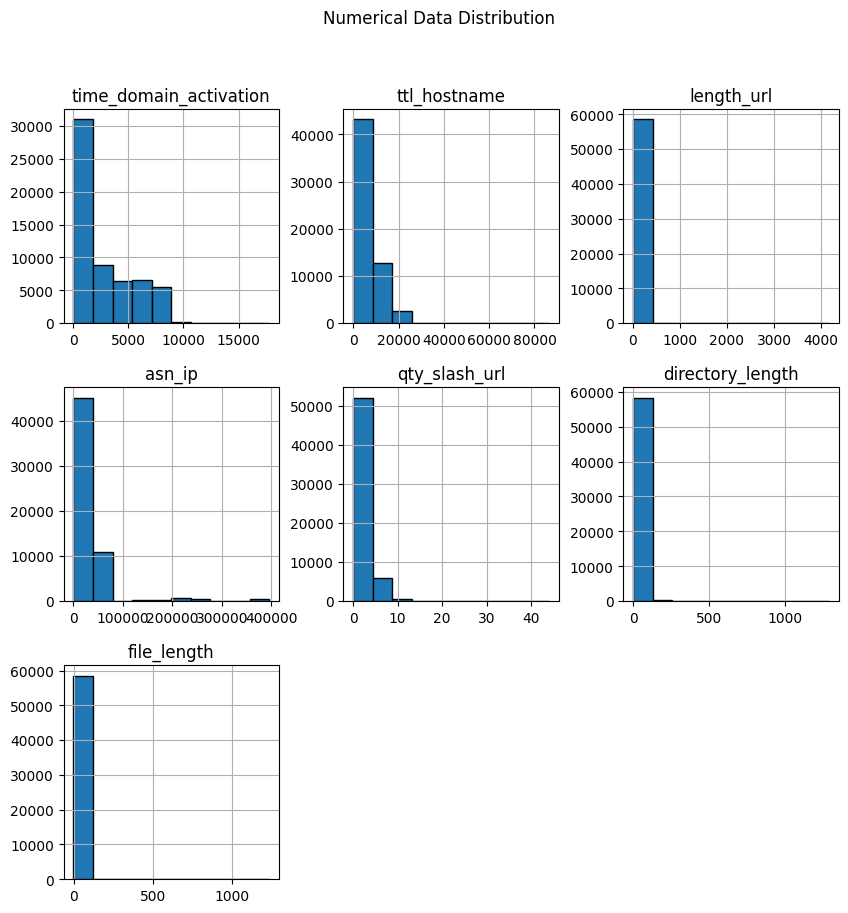

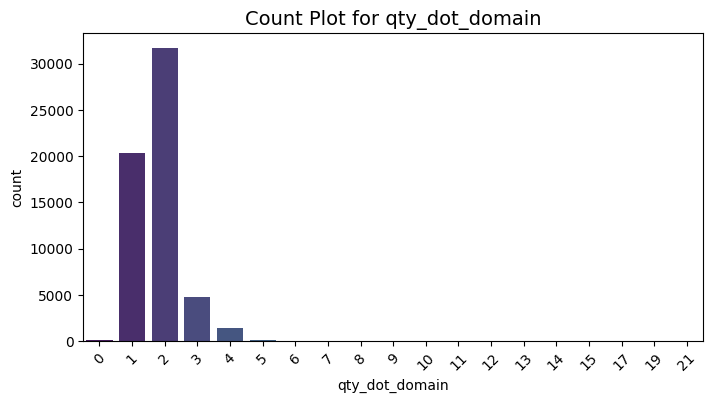

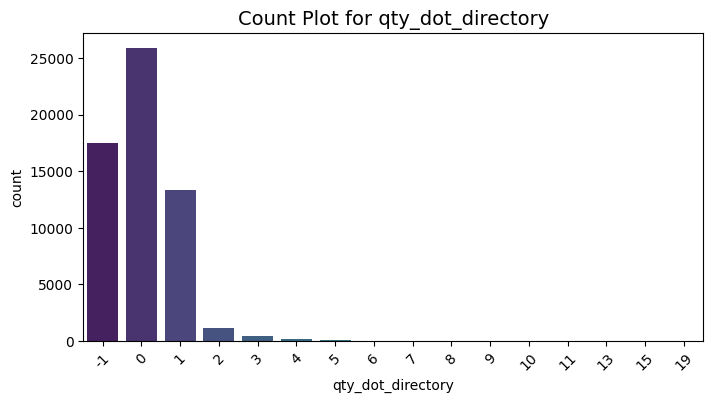

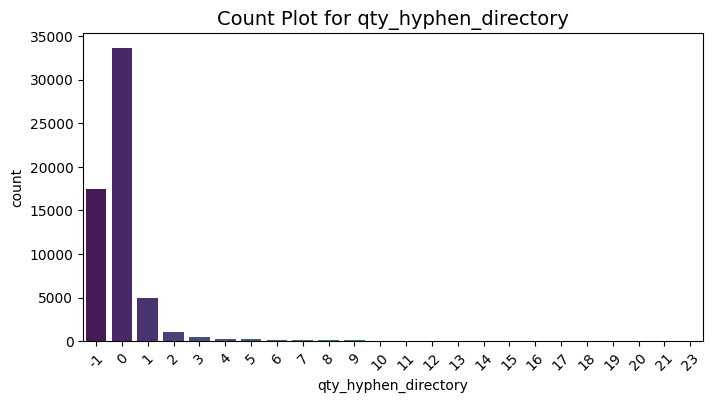

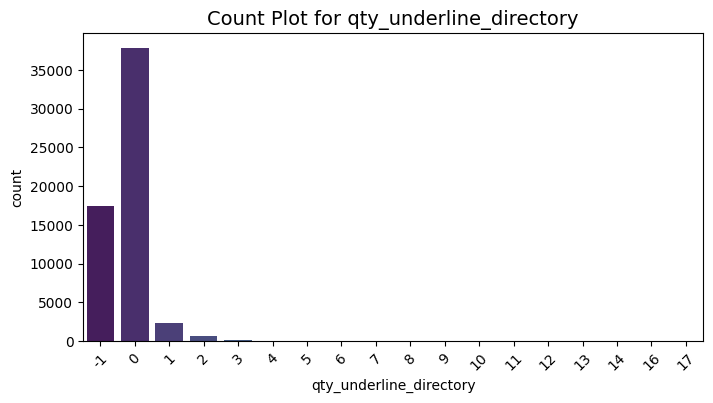

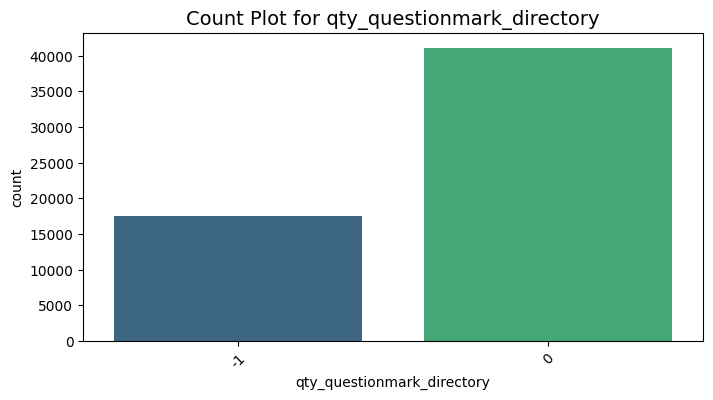

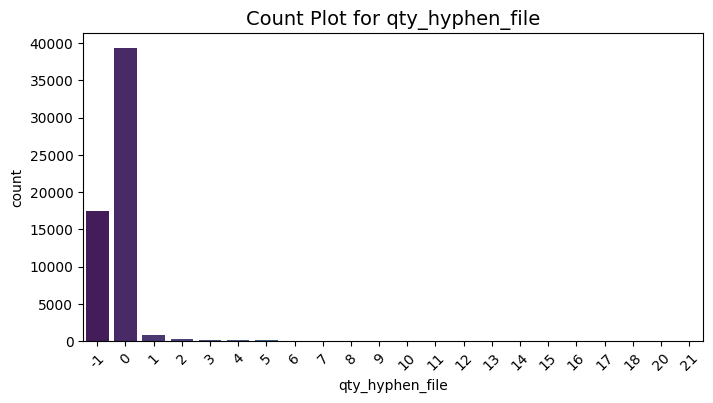

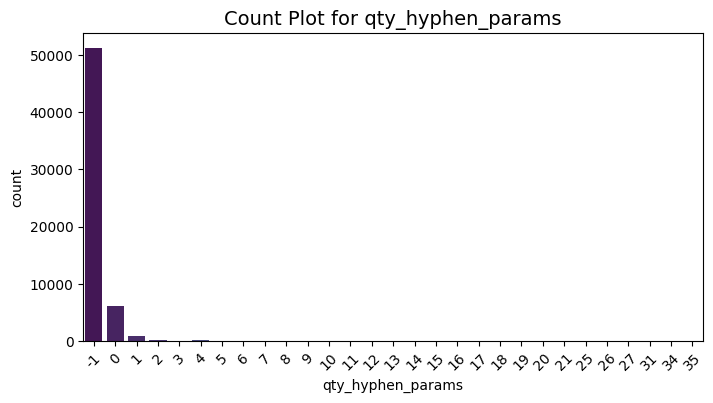

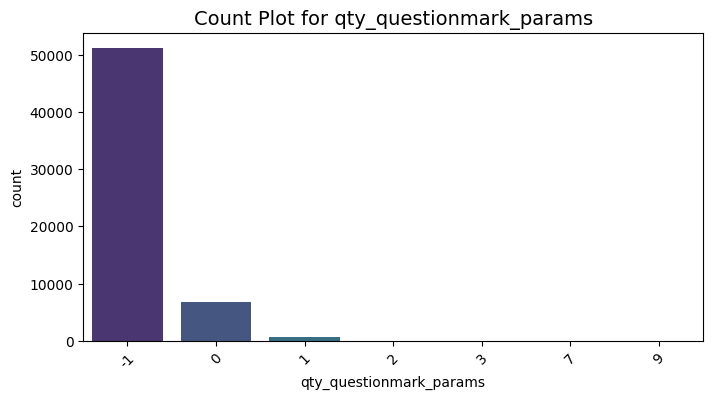

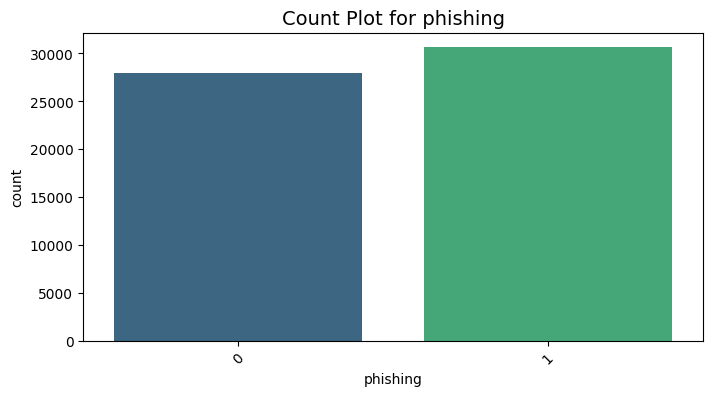

In [14]:
# Separate numerical and categorical data
numerical_data = data[['time_domain_activation', 'ttl_hostname','length_url' ,'asn_ip', 'qty_slash_url', 'directory_length', 'file_length']]
categorical_data = [col for col in data.columns if col not in numerical_data.columns]

# Plot numerical data
numerical_data.hist(figsize=(10, 10), edgecolor='black')
plt.suptitle("Numerical Data Distribution", fontsize=12)
plt.show()

# Plot categorical data
for column in categorical_data:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column, palette='viridis')
    plt.title(f'Count Plot for {column}', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

Text(0.5, 1.0, 'Histplot of Time-To-Live Hostname')

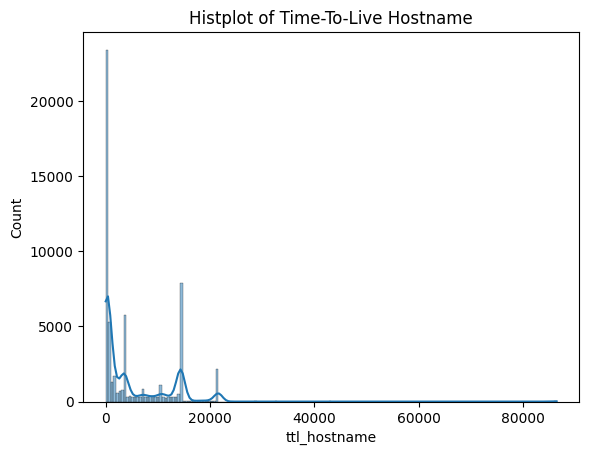

In [21]:
sns.histplot(data['ttl_hostname'], kde=True)
plt.title("Histplot of Time-To-Live Hostname")

Lets find out the correlation between the variables in the dataset.

<Axes: >

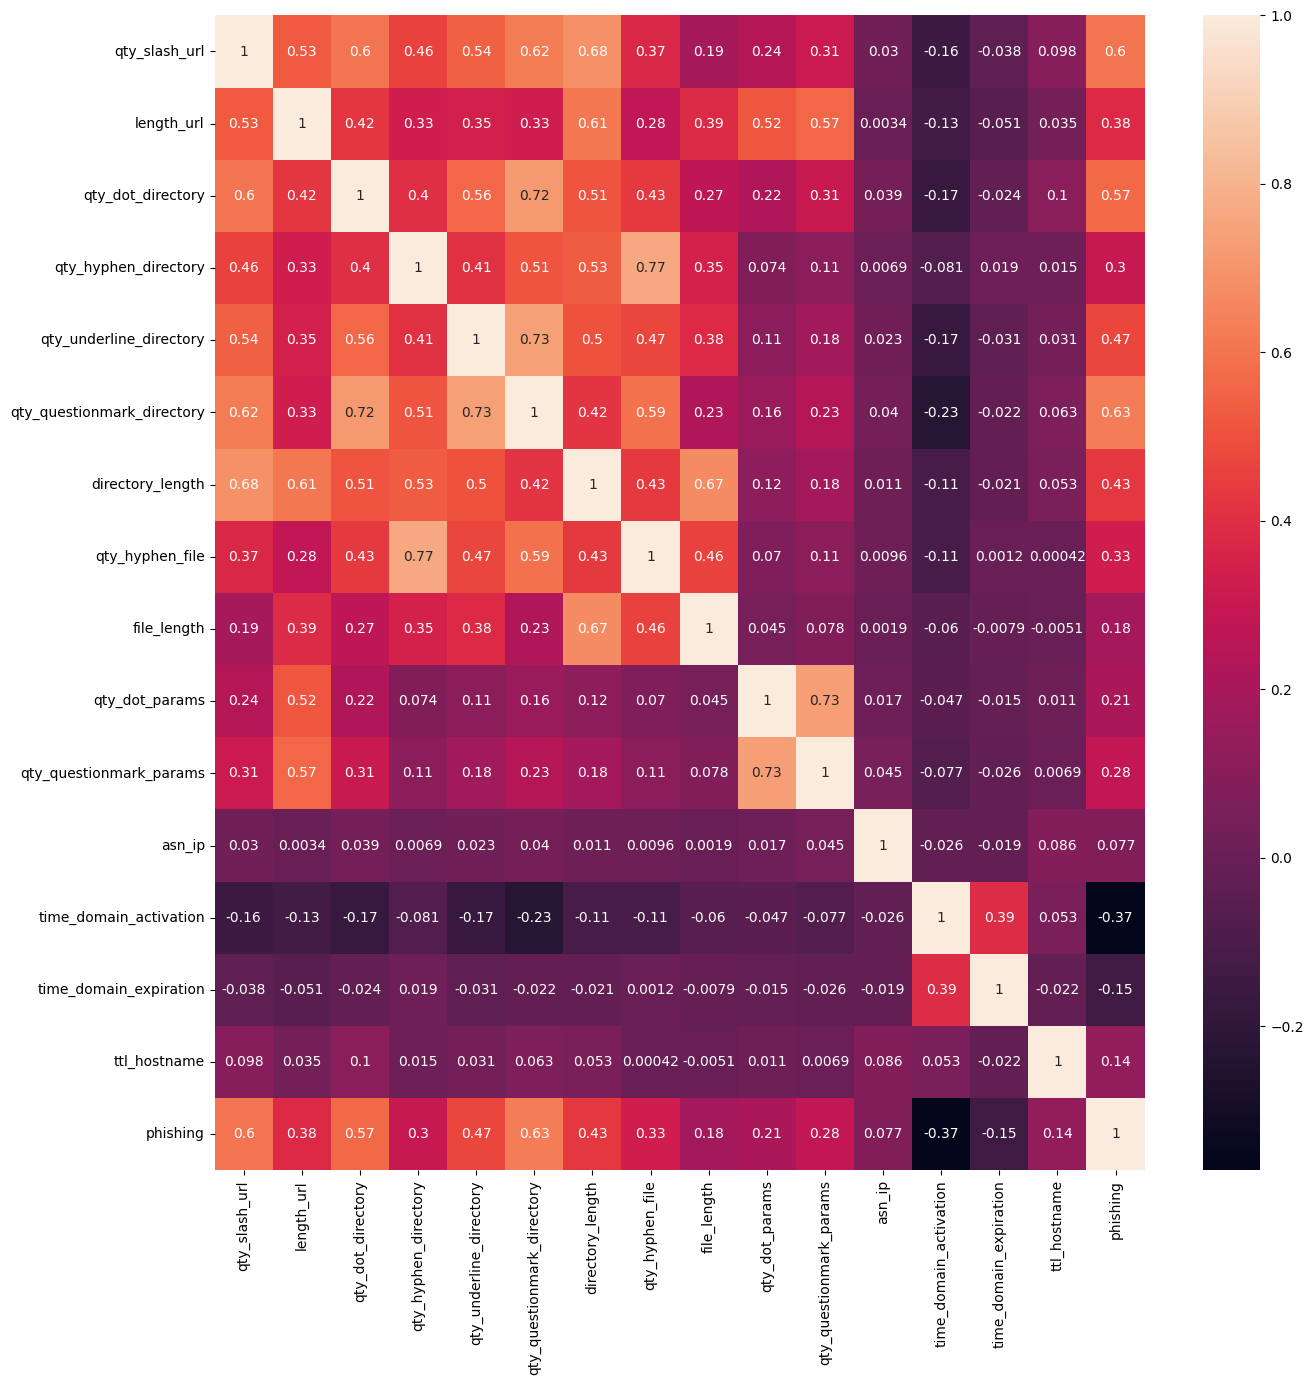

In [48]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(), annot=True)

Feature and Target Selection

In [49]:
X = data.drop(columns = 'phishing')

Y = data['phishing']

X.shape, Y.shape

((58645, 15), (58645,))

Splitting the dataset

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)

#### Outliers Detection

Lets detect the outliers in the features so that we can do something with them that will help to remove them or adjust them accordingly. 

In [51]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

        return [min_val, max_val]
    
    return []

In [52]:
# removing the outliers from the X_train columns using the bounds
for col in X_train.columns:
    bounds = []
    bounds = outlier_count(col)
    if len(bounds) == 0:
        continue
    
    X_train[col] = X_train[col].clip(lower=bounds[0], upper=bounds[1])


---------------qty_slash_url---------------

Number of outliers: 751
Percent of data that is outlier: 1.6%

---------------length_url---------------

Number of outliers: 3480
Percent of data that is outlier: 7.42%

---------------qty_dot_directory---------------

Number of outliers: 160
Percent of data that is outlier: 0.34%

---------------qty_hyphen_directory---------------

Number of outliers: 1993
Percent of data that is outlier: 4.25%

---------------qty_underline_directory---------------

Number of outliers: 799
Percent of data that is outlier: 1.7%

---------------directory_length---------------

Number of outliers: 1918
Percent of data that is outlier: 4.09%

---------------qty_hyphen_file---------------

Number of outliers: 715
Percent of data that is outlier: 1.52%

---------------file_length---------------

Number of outliers: 1567
Percent of data that is outlier: 3.34%

---------------qty_dot_params---------------

Number of outliers: 5939
Percent of data that is outlier: 

#### Scaling
Standardizing the features using StandardScaler. This scales the data to have a mean of 0 and a standard deviation of 1, which is essential for algorithms that are sensitive to the magnitude of features.

In [53]:
# scaling helps in convergence faster. so 
# using standard scalar to scale our train test data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test  = ss.transform(X_test)

In [54]:
# Save the scaler model for later use in website

import joblib
joblib.dump(ss, "scaler.pkl")

['scaler.pkl']

#### Model Selection

In [55]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# models that we will be using, put them in a list
algorithms = [SVC(), RandomForestClassifier(), XGBClassifier()]

# The names of the models
algorithm_names = ["SVC","Random Forest", "Gradient Boosting"]

#### Cross Validation with K-fold

The dataset is divided into K subsets of approx. equal size.The model is trained on K−1 folds and tested on the remaining fold. This process is repeated K times, each time using a different fold as the test set.

In [56]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

SVC - Score: [0.91994296 0.91691935 0.92006525 0.9265641  0.91730254]; Mean: 0.9201588397977426
Random Forest - Score: [0.95641597 0.95308642 0.9476828  0.95261338 0.9573084 ]; Mean: 0.953421394640052
Gradient Boosting - Score: [0.95146819 0.94764826 0.95383044 0.94385246 0.94954222]; Mean: 0.9492683133865955


In [57]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100, 200, 300],  # Number of boosting rounds
    "max_depth": [3, 5, 7],  # Maximum tree depth
    "min_samples_split" : [2, 5, 10], # Minimum samples split
    "bootstrap": [True, False] # Bootstrap
}

grid = GridSearchCV(cv=kfold, estimator=RandomForestClassifier(random_state=42), param_grid=params, scoring='recall')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='recall')

In [58]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 50}

In [59]:
grid.best_score_

np.float64(0.9451634580282715)

In [60]:
best_log_model = grid.best_estimator_
best_log_model

RandomForestClassifier(bootstrap=False, max_depth=7, n_estimators=50,
                       random_state=42)

Accuracy  0.9042544121408475
Precision  0.8881700554528651
Recall  0.93558331981178
F1 score  0.9112603713947056
---------------------------------------------
Classsification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      5566
           1       0.89      0.94      0.91      6163

    accuracy                           0.90     11729
   macro avg       0.91      0.90      0.90     11729
weighted avg       0.91      0.90      0.90     11729

-----------------------------------------------
Confusion Report
[[4840  726]
 [ 397 5766]]


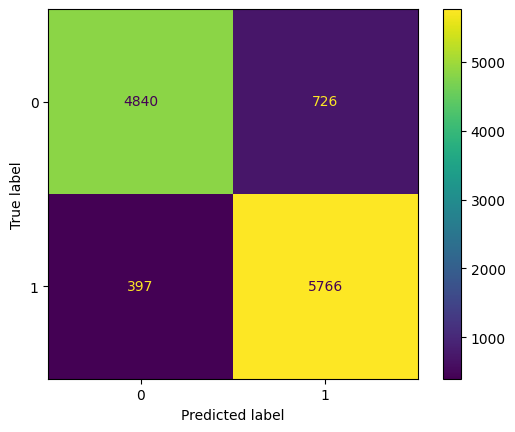

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

ypred = best_log_model.predict(X_test)

print("Accuracy ",accuracy_score(y_true=y_test, y_pred=ypred))
print("Precision ",precision_score(y_true=y_test, y_pred=ypred))
print("Recall ",recall_score(y_true=y_test, y_pred=ypred))
print("F1 score ",f1_score(y_true=y_test, y_pred=ypred))
print("---------------------------------------------")
print("Classsification Report")
print(classification_report(y_true=y_test, y_pred=ypred))
print("-----------------------------------------------")
print("Confusion Report")
print(confusion_matrix(y_true=y_test, y_pred=ypred))
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true=y_test, y_pred=ypred), display_labels = best_log_model.classes_)
disp.plot()

In [62]:
joblib.dump(best_log_model, 'model.pkl')

['model.pkl']